In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

--- Day 20: Trench Map ---

With the scanners fully deployed, you turn their attention to mapping the floor of the ocean trench.

When you get back the image from the scanners, it seems to just be random noise. Perhaps you can combine an image enhancement algorithm and the input image (your puzzle input) to clean it up a little.

For example:

```
..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..##
#..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###
.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#.
.#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#.....
.#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#..
...####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.....
..##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#

#..#.
#....
##..#
..#..
..###
```

The first section is the image enhancement algorithm. It is normally given on a single line, but it has been wrapped to multiple lines in this example for legibility. The second section is the input image, a two-dimensional grid of light pixels (#) and dark pixels (.).

The image enhancement algorithm describes how to enhance an image by simultaneously converting all pixels in the input image into an output image. Each pixel of the output image is determined by looking at a 3x3 square of pixels centered on the corresponding input image pixel. So, to determine the value of the pixel at (5,10) in the output image, nine pixels from the input image need to be considered: (4,9), (4,10), (4,11), (5,9), (5,10), (5,11), (6,9), (6,10), and (6,11). These nine input pixels are combined into a single binary number that is used as an index in the image enhancement algorithm string.

For example, to determine the output pixel that corresponds to the very middle pixel of the input image, the nine pixels marked by `[...]` would need to be considered:

```
# . . # .
#[. . .].
#[# . .]#
.[. # .].
. . # # #
```

Starting from the top-left and reading across each row, these pixels are ..., then #.., then .#.; combining these forms ...#...#.. By turning dark pixels (.) into 0 and light pixels (#) into 1, the binary number 000100010 can be formed, which is 34 in decimal.

The image enhancement algorithm string is exactly 512 characters long, enough to match every possible 9-bit binary number. The first few characters of the string (numbered starting from zero) are as follows:

```
0         10        20        30  34    40        50        60        70
|         |         |         |   |     |         |         |         |
..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..##
```

In the middle of this first group of characters, the character at index 34 can be found: #. So, the output pixel in the center of the output image should be #, a light pixel.

This process can then be repeated to calculate every pixel of the output image.

Through advances in imaging technology, the images being operated on here are infinite in size. Every pixel of the infinite output image needs to be calculated exactly based on the relevant pixels of the input image. The small input image you have is only a small region of the actual infinite input image; the rest of the input image consists of dark pixels (.). For the purposes of the example, to save on space, only a portion of the infinite-sized input and output images will be shown.

The starting input image, therefore, looks something like this, with more dark pixels (.) extending forever in every direction not shown here:

```
...............
...............
...............
...............
...............
.....#..#......
.....#.........
.....##..#.....
.......#.......
.......###.....
...............
...............
...............
...............
...............
```

By applying the image enhancement algorithm to every pixel simultaneously, the following output image can be obtained:

```
...............
...............
...............
...............
.....##.##.....
....#..#.#.....
....##.#..#....
....####..#....
.....#..##.....
......##..#....
.......#.#.....
...............
...............
...............
...............
```

Through further advances in imaging technology, the above output image can also be used as an input image! This allows it to be enhanced a second time:

```
...............
...............
...............
..........#....
....#..#.#.....
...#.#...###...
...#...##.#....
...#.....#.#...
....#.#####....
.....#.#####...
......##.##....
.......###.....
...............
...............
...............
```

Truly incredible - now the small details are really starting to come through. After enhancing the original input image twice, 35 pixels are lit.

Start with the original input image and apply the image enhancement algorithm twice, being careful to account for the infinite size of the images. How many pixels are lit in the resulting image?

Your puzzle answer was 5432.

--- Part Two ---

You still can't quite make out the details in the image. Maybe you just didn't enhance it enough.

If you enhance the starting input image in the above example a total of 50 times, 3351 pixels are lit in the final output image.

Start again with the original input image and apply the image enhancement algorithm 50 times. How many pixels are lit in the resulting image?

Your puzzle answer was 16016.

Both parts of this puzzle are complete! They provide two gold stars: **

In [2]:
inp_example = """
..#.#..#####.#.#.#.###.##.....###.##.#..###.####..#####..#....#..#..##..###..######.###...####..#..#####..##..#.#####...##.#.#..#.##..#.#......#.###.######.###.####...#.##.##..#..#..#####.....#.#....###..#.##......#.....#..#..#..##..#...##.######.####.####.#.#...#.......#..#.#.#...####.##.#......#..#...##.#.##..#...##.#.##..###.#......#.#.......#.#.#.####.###.##...#.....####.#..#..#.##.#....##..#.####....##...##..#...#......#.#.......#.......##..####..#...#.#.#...##..#.#..###..#####........#..####......#..#

#..#.
#....
##..#
..#..
..###
""".strip().split('\n\n')

In [3]:
inp = """
##.##.#..###....##..##.#.##...#..#..##.####..##...###.....##.####.##.##.##...####.######..#.###.#.##..###.#..#####...#.##.#..#.#.#..######..###.##.#..##.#..##..##..#...###.##..####.#..#....#####.#.###..##.....#...#.##.#####.###.###....#.#..###.##.##.#..##.##.#.##..##.##.##..###.#.#....#.##..###.###.#.##......#.##..#..#.#...##.##.....###...#..#...###..##.####..#..##..#.#..###......#.#####....#####..###..####...###.#.####..#.##..#.#####..##...##.#.#.#...##.#...#.##.##..#.#.##....##.####.#.#..#.##.#.#..#..#.#.

.#..###.....###.#..#.#.###.#..##.#.#..#.###.#..##..#.#.#.##.##..###....#..#.#....####.##...##....###
.#.#.##.#..###...#.#.####..#...##.#.#...#..#...#.###...##..#.#..#.#.##..#.##..#.###.##..##..#...#.##
##..##.#....#...#....##.#..####..#.#.####....#.##..##.###...#..#..######.####....#..#.#.#.###..#.###
.##.#.#..#......##......##.#.#.#.###...###.#.##...##..#..#..######.#.##.###.#...#.#.####.#.#.####...
...#..#####..#....###...#.......#.#..####..#....##..#..####...#...#..#.....#..#...#.#.....##..####.#
##..##.....###.#.##.#.###.###.#.#####..#.....#...##.#.##.#...##..#####...##.###..###...#...#.##...##
#.#####..###...#.####.#.#.....##...###.#..##.##...#...##.#..#.###..###.#.##..#.##..##.###.#.#.#...#.
##...#.#...#..####.#.#..###...#####.#######.##..###..#.#.###.#.#.#..#####.##.#......##.#.#.#..##..#.
.#.#.#.#..#...##.#.#..###.###.#.#...##..#..##.####.#########.......#.#.#.#.#.#.#..##.#..#..#....##.#
#######.#.##.##..#......#..#...##..##...#..###.#...#....#.####.##.#.##.....###...##.##..#..##...####
#.###.#....##.##....#.....####.#.####...###..#..###..#..###.##..###.##.##....#####.##...###.#.##..#.
...##...##.###.#.#..........##..##.###..#..#....#..#...#.##.#..####.#.#.###..###..#........###.#.##.
#....#..######....##.######.#.########....#.###.###.#####.#.####.#.....#..#.###.##...........##.###.
..##.#######.##.#..#.#.#.###..........#.#.#...##...###..####.#.#....#.####.#..#.#####..####.##.#.###
...###..#...#.###.#.#######..#####.....#.##.##..##....##....#####.#..#.##..##...##...#.#.##...#.##..
.#...###.#.....#.##.######.#.#..#.....####....#..###.##.........#.###.....#....#.###.....##.#.#.####
.###.##..###....##...##......###...#....#.##....#...#.#.####.#.......#..#.#.######...###........#..#
.###..#...#..#..##....##..#.#.#....#..#.#.....#.##.....#.#####..##...#.###..#...#.##..###.####.#.###
#..#......#####.###.#.##.###...#.#..#....#.##..#..#....#.#..#.##.###...####...##.######.#...#.#..#.#
.#..#...#####..#.#.#.###.#..##..#.##.#...#..#.##.#..#.##..#..#..####.....#......#.#.#.##...#.##..###
..#....#..#..##.####.###.#..####...###.#.####.###.#.##....##.....#.##.#.##....##...#....#.##.#####..
######..#..#...##.#........##.##.#...####...##.....#.##.#.#.#..#.#..##.#...##...#.#.....#.#..#..####
##...#....#.#.#.....#.#.##.#..#...###..######...###..#.#.#....###.####.#######.##.#.#....#..###..#..
##.....#....#.#.##.##.#....#.###...##.##.#....##.#####..###.##.#...#..##..#.###.#.#.#...#.########..
.......###.#.##.....#.##..##..#.#..#.####.#.#...#.##.###.#.##...#..####......#.##.###.#.#...#.....#.
.##.#.##...#..##.#.#...###..#.#...###.##..#........##.#.##...##.########.......##.#.##.####..####.##
#.#..###.#...##.....#....#...##..##.#...##.....#..#####...###.##....#####.####.##.#...#...####....#.
###.####.##....##.#.##.##.....#.##..##.##.##.#.#.##.#..#.###.##..#.##.....#.#...##.##..#.#.##.##.###
#......##..##.##.#.#####.##..###.....#.##.........##..###.##..#...#..###.#..#.####...#####..#..###.#
#.##.#.#...##..#..#.#..#.###.#...#..#...#####....###....#..#.###...#.###.#.#####.#..#....##.##..##.#
..###..###.#..........#.....#...##..##.####.#.##.##.#.#.#..##.#..###..#..#..#...##..#.#..#.#####.#..
.###..#.###..###..#...#...##.#......####...####..#..###.#.######...#.###..##.......##.##.########.##
...#...#...#..##....###.#.###..##.#.#...##....#.#...#.#.#....#..####.####.####..#.#######.#.#.....#.
.#...#....##....#.##...##...##.#..####.....####..##.###..#..##.........##..#...####..##......##.#.#.
##.####.#...####.#..###..#####.#.#######.#.#...###..###....##..##..##..#......#.#..#.###.###.##.#..#
...###.##.####.##....##.....#.#...##.#..#.#.#.##..#.#.###..#..#..##.#.##.#..####..####.....#.#.#..##
#.#.##.##....#.###.##..####.##..#.#..##..#.###.#..###.#....##..#...#...#..#.#.#.#.#....##...##..#.##
####.####.#####.####.##..#.###.#..#..#.....###......#......#...#.#.#....#....#.##.###..#.#.##.#####.
.##.#..#.###.#.#.###.....###.######..#..##.###.#.##..#..#.####..#.##.##.#.###..####..#..##.#########
###..######......#...#..###.##.#...######....#.###....#...###....##.#..##..##.#.##.#....###.###..##.
#....###..##....###...#.#...##..##...#.......#.####.....######..###....###..##...##.#..###.#.##....#
.##.##...##..#..##...########.##..##.##.#......##.##..#####.#.#..######.#####....#.#.....##..####...
#.......##.##.#..#....#.#.###...#.##.##...#..#.#..#..#.#.##.#...##.###.###...#.######......##..###.#
##.###.######.#..###..##.#.#.#.........##...##.####.#.####............###....#...#..#.#####.#..###.#
#####...#..##.#.#.#.#.#..####.##.#####.###.###...###.###.#.##..##...##..##..#.#.#...##...#.####..##.
...##..#...#..#.###..#...#.##...##.##..#.##.#..##.#..#.###....##.#######.###.#.###..#.###..######.##
.#..####....##.#..#.#.######.#..#...##..#....##.#....##.##.###..#...##.....##.###..#.##.....##..#..#
....###.####.#..####.....#....#.###...#.....#..##..#.#####.###.####.#.....#####.......###.###.##..#.
..#...#..#.##..##.###.##......#..#.##..######..####..#.#####..###.######..####...####..#.#####..#...
####....##...#.##.##.####..#..#.#...#..###.##..###...#......#.#..##..#.##....######.........##..##.#
..#...#.####.###.#.#..###..#.####..#.#.#.#..#..#..###.#...#...#.##.#.#####.##..#.##.##.......#..##..
##...#.##...##.#..###########.#.#.#####.#.##.#####.#.#..##.#.#.####.......#....#.#....####.#...###.#
..#.##...##..##.#.#......###.#...#####.....#...#..####...########.###.#####..##.###...#.#.#..#...###
#.##..#####.#...#..#.#...####.........##..#..#.#.#..##..#.##...###....#.##..#..#.#.#.#.#..#......#.#
.#..##..##.###.##..##...##.#.####..##.###.#..#.###.#####..#..#...##..#.#####........#...###.##.#####
..##..#.###..########.##.#....###.####.#.#..#.#.#...#.#.#..##...##.#..##..##..#.###.##.####...#.....
###.#.###.#.......#.####.###.....#.####.#.#..#...###....#.####........#...##.##.#..#...####.#######.
.##...#...#....##.#.##.###.....#..#..##.#..#..#####..#.##.#####.#....#...#.#.....####.#.###.#.#.###.
######.#.#..#.###.#..#.######.#.#########..##.#.#...##..###.....###...#.###...#.#..###.#.###..####.#
..#.#.##.#.###.#....#.#.####.#..#.##.##.#..###...###...##.#.#.##.##.#.###.#.#...#.#.#..#.##.#####...
###.#...#.#..##...#.....##.#..##.#.###.#..#.##...#......###..##.###.....##.##....#.##.#..#####.#...#
#..#..########...#.#####.###.#...#####....##.#...##...#.#.######.##....###.#.######..#..##.##.#.#.##
..#.#.#....#.#.#.#.#.#..##..#....#...####.##..###.#...#.#.####.##.#....###.#...###.###..#.##.....#.#
#####.####..#.#....#.#......##....##..#######....###.#.#.#.#.#.##.#..##.#..####.###.#...#.###..#.###
#.###..#...###..#...##.#####.###...#.#.#....#######.##.##.###..##..#....##...#.##.#.#...#####.#.#...
.##..##..##..###..#.#..#..#.#.#.#.#..##..###..####.#..###.#.#....########..###.#.#.##.########..##..
.....##..#..####.#.#..#...#..#..#..#...#.#.#####.....#..#.###...######..###...#...#.##.##..##.##..##
.###..####..###...#.####....##..#...#.#.#.....##.#.######....##..###..###.####.##...#......#..##.#..
#...###..#..#.#.#..#..###.###...#..#........#.#.#.##...#.####..#.#.#...####..#.##.#..#....#...#.#..#
#.######..####.######..##.##.#.####.....##..#.#.###.####..#...#..##..#..##.#####.#.#########...##..#
.#.#...#.#..###....###..#....####.#....##..######.....#.####.###.#...##.#..#..#...#.#.#..#..####..##
##..#.#..##..#####..#.###.....##.#.#...##.##..#.##.#......#.#..###.......#####...########..#...#..#.
#..##.###.##.#..##.#..#...####.#.#...#.##..#.###.#.#..#####.###...#.###.####...##...##.#...###.###.#
.#.#....#.##.##.####.##.#.##..###.###.....#..##.#####.....###............#.#.##.#.#..#.#..##.#......
#..##..##.###.#..#.#.###.#####....#..#.#####.##.#.####.#####.#...#..######...#.###..#......##..#..#.
..##.##.#...#.#..###....#.#...#.#.#####..###.###.#..#####.....##..#..#.#.#.#.###.##..##..####.#....#
##...#..##.#.##..###.#..#..##.##...##....#..##..##.#####.###..#.#.##...##.#####.#.##.##....#......#.
#.#..#.#.####......#.##....##.#....###...##.#####....###.#.##.######..###...#..###..####...#####.###
.##.##...###.#.##.##........##..###..#.#####....##.#...#..#####.###.#...##...######.##...###.#..#...
#...#...##.#....#.###.##.##.#####.###..##..#..##.##...##.#.#####...##..##..##........###..#...##.##.
..##..##..##.#..#.#.###..###..##.#.#.#.#.#.......#.##.##.#.##.#####......##....#..#......#.####..##.
.#.#.#....#..#...#..#.##.#.....####.#.###..##.#..#.....###....##.###...##..#.###..###...#.#.#..#...#
..######.##.#####.##.######.##....###....####.....#..##..#.#####.#.#.#.##...###.#####.#......####...
.##..#.#######..#...###..##.#.#.#...#...#####.#.#.##.#.....###..#.##..#.#.#.####.###..#####....###..
..#...##..####....####..#.##...#.....####..#......#.##.###.#....#..#..##.####....###.#..#.###..###..
.##..##..######.##....#.##.#..##.#.#.#...##...#.##.#.##.###..#..###..##.##..#...###..#.#.#..##.###.#
####.#..##.#.###..##.##..#..###..#.#.....#.#.#.##..##..###.#.....#.##.#.#.##.###.###...####.#.##.#.#
.##..#####.###.#...#######.#...#.#.####.####.#..#...#.#..#######..#...##..###.#..#####.##..#.#.##..#
####..####.##....##.#.#.##.#..##...#.##.#.####...#.#####.#.##...#.#.##.##.#..#.###.#.##...###..###.#
.#..##....##..#.##...##..####....###..#....####.#.###...###.#.#..#.#.##.##..###..##.#..###.##.#####.
#.#....######....#....##.#.#.###.#..####...##.###...###..#.###.#..##.##....#...####.#.##....#...#.##
...#..#.###.##.##....####.#.#.######.###....##.######.#..##.#..##...##...###..#######....#.##..#..##
#....#.##.###.##......#....###.##.#..########.#####.##.#######.###.##.###..#.#.#.#...#########..#.##
###.#..#...##.#....##..###.....#.#.#.##..#####.##.###.#.#...#.####.#..####.#....#####..##.#.#.......
##...##...###...#.#.##....##.......#...#........####....#..#.###....#.#.####........##.#...##..#####
.....#...#....#.#####.#..#.#.###.#..###..........#...########.#......#.######..#.#..#.##.#.#..##....
..#.###.#..#.##.##..#.#...####.##.#.##.###...##.#..#..##.#.##...##.....#...##.###......#..#.######..
.##...#..##.##..#.###.#.#..##.#..##..###.##..#.##.....#.#.#######..###.###.##.###..#.#...##..#.#..##
#.#.#.##.##..###.##.#.##.##...#.##.#####.#.#.....###.##..#####.......#.####.#..#.###.###.##.#.#...##
#..#..#.#...#..##..###.##..##.#.###.##...#....#..#...##.#####.##..##.#...###.#..##.###..####.##.##.#
""".strip().split('\n\n')

In [4]:
inp

['##.##.#..###....##..##.#.##...#..#..##.####..##...###.....##.####.##.##.##...####.######..#.###.#.##..###.#..#####...#.##.#..#.#.#..######..###.##.#..##.#..##..##..#...###.##..####.#..#....#####.#.###..##.....#...#.##.#####.###.###....#.#..###.##.##.#..##.##.#.##..##.##.##..###.#.#....#.##..###.###.#.##......#.##..#..#.#...##.##.....###...#..#...###..##.####..#..##..#.#..###......#.#####....#####..###..####...###.#.####..#.##..#.#####..##...##.#.#.#...##.#...#.##.##..#.#.##....##.####.#.#..#.##.#.#..#..#.#.',
 '.#..###.....###.#..#.#.###.#..##.#.#..#.###.#..##..#.#.#.##.##..###....#..#.#....####.##...##....###\n.#.#.##.#..###...#.#.####..#...##.#.#...#..#...#.###...##..#.#..#.#.##..#.##..#.###.##..##..#...#.##\n##..##.#....#...#....##.#..####..#.#.####....#.##..##.###...#..#..######.####....#..#.#.#.###..#.###\n.##.#.#..#......##......##.#.#.#.###...###.#.##...##..#..#..######.#.##.###.#...#.#.####.#.#.####...\n...#..#####..#....###...#.......#.#..####..#....##..#..####...#...#..#...

In [5]:
from dataclasses import dataclass, field, asdict
from pprint import pprint
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

Answer: 3351
Answer: 16016


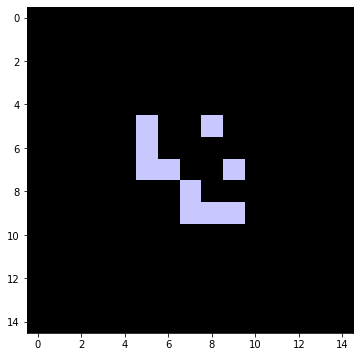

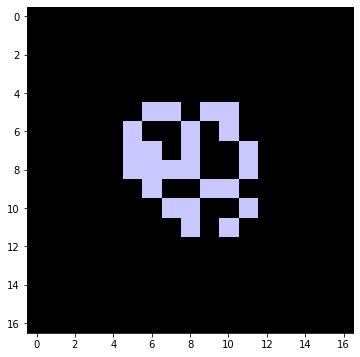

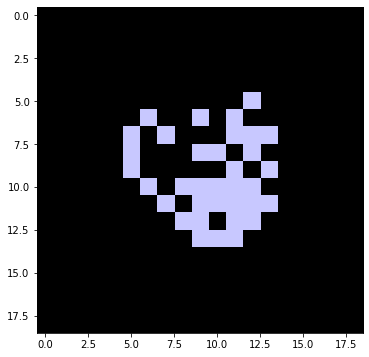

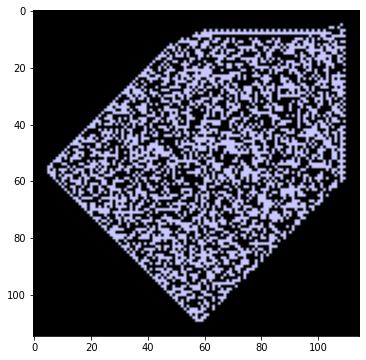

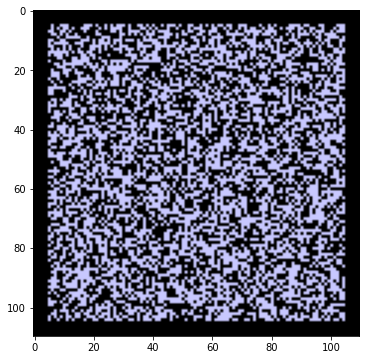

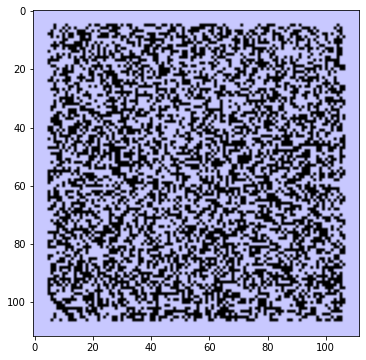

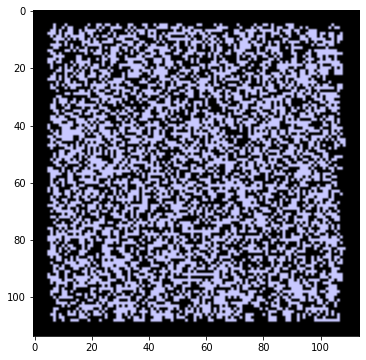

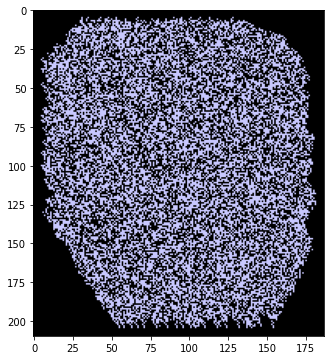

In [18]:
# @dataclass
# class Algo:
#     mask: str
#     cache: dict = field(default_factory=dict)
    
        
@dataclass
class Image:
    px: set[tuple[int, int]]
        
    min_row_idx: int
    max_row_idx: int
    min_col_idx: int
    max_col_idx: int    
        
    def __init__(self, image_data: str, algo: str):
        self.px = set()
        
        self.algo = algo
        
        self.algo_0 = algo[0]
        self.algo_1 = algo[int('111111111', 2)]
        
        # initially, everything around is a '.'
        self._miss_char = '.'
        for row_idx, row in enumerate(image_data.splitlines()) :
            for col_idx, c in enumerate(row):
                if c == self.hit_c:
                    self.px.add((row_idx, col_idx))
        self.compute_minmax_indexes()        
              
    @property
    def hit_c(self):
        return '#' if self._miss_char == '.' else '.'
    
    @property
    def miss_c(self):
        return self._miss_char
            
    def op(self, char: str):
        return '#' if char == '.' else '.'
            
    def compute_minmax_indexes(self):
        self.min_row_idx = 900000
        self.min_col_idx = 900000
        self.max_row_idx = -900000
        self.max_col_idx = -900000      
                    
        for i in self.px:
            row_idx, col_idx = i            
            self.min_row_idx = min(self.min_row_idx, row_idx)
            self.max_row_idx = max(self.max_row_idx, row_idx)        
            self.min_col_idx = min(self.min_col_idx, col_idx)
            self.max_col_idx = max(self.max_col_idx, col_idx)
        
    def vis(self):
        res = []
        gap = 5
        
        for row_idx in range(self.min_row_idx - gap, self.max_row_idx + gap + 1):
            row = []
            for col_idx in range(self.min_col_idx - gap, self.max_col_idx + gap + 1):
                row.append(self.hit_c if (row_idx, col_idx) in self.px else self.miss_c)
                
            res.append(''.join(row))
        return '\n'.join(res)
    
    def vis_image(self):
        pixels = []
        for r in self.vis().split('\n'):
            row = []
            for c in r:
                row.append((0,0,0) if c == '.' else (200,200,255))
            pixels.append(row)
            
        arr = np.array(pixels, dtype=np.uint8)
        plt.figure(figsize=(6,6))
        plt.imshow(arr)

    def cells_around(self, row_idx: int, col_idx: int):
        return [
            (row_idx-1, col_idx-1),
            (row_idx-1, col_idx),
            (row_idx-1, col_idx+1),
            (row_idx, col_idx-1),
            (row_idx, col_idx),
            (row_idx, col_idx+1),
            (row_idx+1, col_idx-1),
            (row_idx+1, col_idx),
            (row_idx+1, col_idx+1),
        ]
        
    def enhance(self):
        new = set()        
        found = 0
        gap = 1
            
        if self.algo_0 == '#' and self.algo_1 == '.':
#             print('Flipping chars')
            new_hit_c = self.op(self.hit_c)
            new_miss_c = self.op(self.miss_c)
        else:
#             print('Not flipping chars')
            new_hit_c = self.hit_c
            new_miss_c = self.miss_c                
        
        for row_idx in range(self.min_row_idx-gap, self.max_row_idx + gap+1):
            for col_idx in range(self.min_col_idx-gap, self.max_col_idx + gap+1):        
                binary = []
                
                for pixel_key in self.cells_around(row_idx, col_idx):
                    if pixel_key in self.px:                        
                        binary.append('1' if self.hit_c == '#' else '0')
                    else:
                        binary.append('0' if self.hit_c == '#' else '1')
                    
                algo_index = int(''.join(binary), 2)
                
                new_pixel = self.algo[algo_index]
                if new_pixel == new_hit_c:
                    new.add((row_idx, col_idx))
        
        self.px = new        
        self._miss_char = new_miss_c
        self.compute_minmax_indexes()


        

def solve12(data):
    algo, image_data = data
    img = Image(image_data, algo)
    
    img.vis_image()
    for i in range(50):
        img.enhance()
        if i in {0, 1, 49}:            
            img.vis_image()

    print('Answer:', len(img.px))
    
    
solve12(inp_example)    
solve12(inp)  # 4878 is incorrect

In [7]:
plt.figure?